## IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORTING THE DATASET

In [2]:
dataset = pd.read_csv("emails.csv")
dataset

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [3]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [4]:
X.shape, y.shape

((5172, 3000), (5172,))

## TAKING CARE OF MISSING DATA

In [5]:
dataset.isna().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [6]:
dataset.info

<bound method DataFrame.info of        Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrast

## REGRESSION TECHNIQUES

## 1. MULTIPLE LINEAR REGRESSION

## SPLITTING THE DATASET INTO TRAIN AND TEST SET

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4137, 3000), (1035, 3000), (4137,), (1035,))

## TRAINING THE MODEL

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

### TRAINING THE REGRESSION MODEL

In [11]:
regressor.fit(X_train,y_train)

LinearRegression()

In [12]:
print("b value:",regressor.intercept_) 

b value: 0.45761728801051527


In [13]:
print("m value:",regressor.coef_)

m value: [ 0.01498092  0.00126187 -0.02455102 ... -0.03706555  0.04028757
 -0.13135301]


## EVALUATING THE MODEL

### REGRESSION METRICS ON TRAIN SET

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [15]:
MAE1 = mean_absolute_error(y_train,regressor.predict(X_train))
print("Mean Absolute Error:", MAE1)

Mean Absolute Error: 0.0571421786814636


In [16]:
MSE1 = mean_squared_error(y_train,regressor.predict(X_train))
print("Mean Squared Error:", MSE1)

Mean Squared Error: 0.008044443360760522


In [17]:
print("Root Mean Squared Error:", np.sqrt(MSE1))

Root Mean Squared Error: 0.08969082093927183


In [18]:
r2 = r2_score(y_train,regressor.predict(X_train))
print("r2 Error:", r2)

r2 Error: 0.9610312901980154


### REGRESSION METRICS ON TEST SET

In [19]:
MAE2 = mean_absolute_error(y_test,regressor.predict(X_test))
print("Mean Absolute Error :", MAE2)

Mean Absolute Error : 19.752074262123088


In [20]:
MSE2 = mean_squared_error(y_test,regressor.predict(X_test))
print("Mean Squared Error :", MSE2)

Mean Squared Error : 362552.82588035066


In [21]:
print("Root Mean Squared Error :", np.sqrt(MSE2))

Root Mean Squared Error : 602.1235968473172


In [22]:
r2 = r2_score(y_test,regressor.predict(X_test))
print("r2 Error :", r2)

r2 Error : -1779090.392137785


## 2. LOGISTIC REGRESSION

## Visualizing the Dataset

<AxesSubplot:xlabel='Email No.', ylabel='and'>

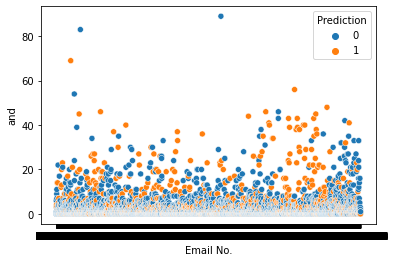

In [23]:
# using one particular column for visualization
sns.scatterplot(x ="Email No.", y ="and",data = dataset,hue = "Prediction")  

## SPLITTING THE DATASET INTO TRAIN AND TEST SET

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 2)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4137, 3000), (1035, 3000), (4137,), (1035,))

## TRAINING THE MODEL

In [27]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()

In [28]:
log_classifier.fit(X_train,y_train)

C:\Users\A.GOWTHAMI\anaconda3\envs\envbsc\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## EVALUATING THE TRAIN MODEL

In [29]:
y_train_pred = log_classifier.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [30]:
y_train

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score
print("Accuracy of Train set :",accuracy_score(y_train,y_train_pred))

Accuracy of Train set : 0.9891225525743292


## EVALUATING THE TEST MODEL

In [32]:
y_test_pred = log_classifier.predict(X_test)

In [33]:
print("Accuracy of Test set :",accuracy_score(y_test,y_test_pred))

Accuracy of Test set : 0.957487922705314


# CLASSIFICATION TECHNIQUES

## 1. NAIVE BAYES

## Visualizing the dataset using Barplot

<AxesSubplot:xlabel='Prediction', ylabel='count'>

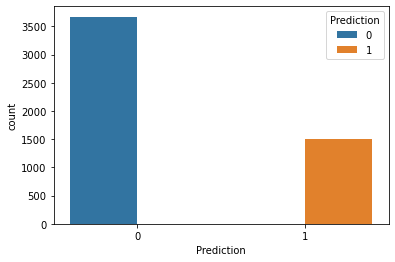

In [34]:
sns.countplot(data = dataset, x = dataset['Prediction'],hue = "Prediction")

## Splitting the dataset into train and test set

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X.shape,y.shape

((5172, 3000), (5172,))

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [67]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4137, 3000), (1035, 3000), (4137,), (1035,))

### Model (Naives Bayes)

## Training the model (Naive Bayes)

In [68]:
from sklearn.naive_bayes import MultinomialNB

In [69]:
classifier = MultinomialNB()

In [70]:
classifier.fit(X_train,y_train)

MultinomialNB()

## Evaluation (Train set)

In [82]:
y_train_pred = classifier.predict(X_train)

In [72]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of Train set : ", accuracy_score(y_train,y_train_pred))

Accuracy of Train set :  0.9480299734106841


<AxesSubplot:>

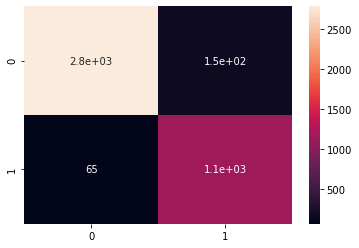

In [74]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot = True)

## Evaluation (Test set)

In [78]:
y_test_pred = classifier.predict(X_test)

In [79]:
y_test_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [80]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of Test set : ", accuracy_score(y_test,y_test_pred))

Accuracy of Test set :  0.9342995169082126


<AxesSubplot:>

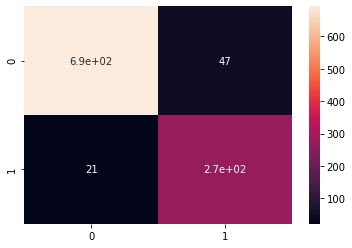

In [81]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot = True)

## 2. KNN classifier

## Splitting the dataset into Train and Test sets

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [53]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4137, 3000), (1035, 3000), (4137,), (1035,))

## Training the model

In [54]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)

In [55]:
classifier.fit(X_train,y_train)

KNeighborsClassifier()

## Evaluating the model(Train set)

In [56]:
y_train_pred = classifier.predict(X_train)

In [57]:
y_train.shape,y_train_pred.shape

((4137,), (4137,))

## Calculating the accuracy 

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of Train set : ",accuracy_score(y_train,y_train_pred))

Accuracy of Train set :  0.9168479574570945


In [59]:
cm = confusion_matrix(y_train,y_train_pred)
cm

array([[2704,  228],
       [ 116, 1089]], dtype=int64)

<AxesSubplot:>

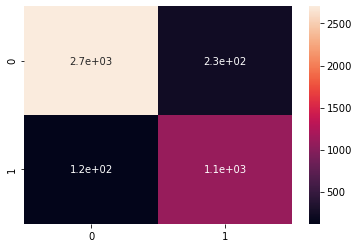

In [60]:
sns.heatmap(cm,annot = True)

## Evaluating the model (Test set)

In [61]:
y_test_pred = classifier.predict(X_test)

In [62]:
print("Accuracy of Test set : ", accuracy_score(y_test,y_test_pred))

Accuracy of Test set :  0.8628019323671497


<AxesSubplot:>

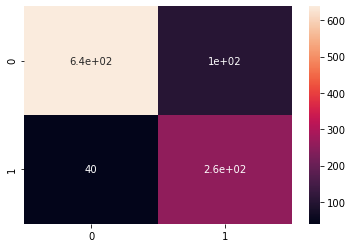

In [63]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot = True)